In [1]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stablediffusionapi/deliberate-v3")

/Users/oana/PycharmProjects/midjourney-4-style/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


model_index.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/Users/oana/PycharmProjects/midjourney-4-style/venv/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [2]:
prompt = "RTX, UNREAL ENGINE, Global illumination, Deep glow, Particles Highly detailed painting image quality of In the craziest of worlds I found you gorgeous goddess beautiful woman with long hair dark dress unreal engine, fantasy art by greg rutkowski, loish, rhads, ferdinand knab, makoto shinkai and lois van baarle, ilya kuvshinov, rossdraws, tom bagshaw, global illumination, radiant light, detailed and intricate environment"
def get_inputs(batch_size=1):
    prompts = batch_size * [prompt]
    num_inference_steps = 50

    return {"prompt": prompts, "num_inference_steps": num_inference_steps}

In [3]:
def dummy(images, **kwargs):
    return images, [False]
pipeline.safety_checker = dummy

Token indices sequence length is longer than the specified maximum sequence length for this model (92 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tom bagshaw, global illumination, radiant light, detailed and intricate environment']


  0%|          | 0/50 [00:00<?, ?it/s]

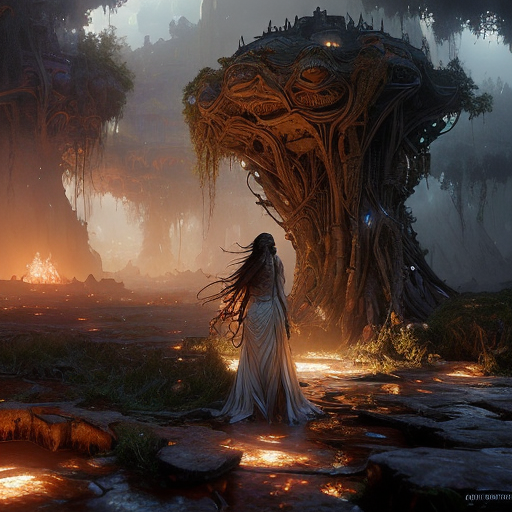

In [4]:
pipeline.enable_freeu(s1=0.9, s2=0.2, b1=1.2, b2=1.4)
images = pipeline(**get_inputs(batch_size=1), max_embeddings_multiples=3).images
images[0]